In [1]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('diabetes.csv')
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [3]:
df.sample(n=10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
403,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
431,42,Male,No,No,No,Yes,Yes,No,No,No,Yes,No,No,Yes,No,No,Positive
171,48,Male,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Positive
243,35,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Negative
423,66,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,No,Positive
133,16,Male,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Positive
406,56,Male,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
72,65,Female,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Positive
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
152,55,Male,No,Yes,No,Yes,No,Yes,No,No,Yes,Yes,No,No,Yes,No,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
df.shape

(520, 17)

In [7]:
for col in df.columns[1:-1]:
    print(df[col].unique())

['Male' 'Female']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.columns[1:]:
    df[col] = encoder.fit_transform(df[col].values)
    
df.sample(n=10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
443,35,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1
205,67,1,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0
336,42,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
148,44,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1
333,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,68,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
31,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1
256,50,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,1
58,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
269,48,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1


In [9]:
for col in df.columns[1:-1]:
    print(df[col].unique())

[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]


In [10]:
df['class'].value_counts()

class
1    320
0    200
Name: count, dtype: int64

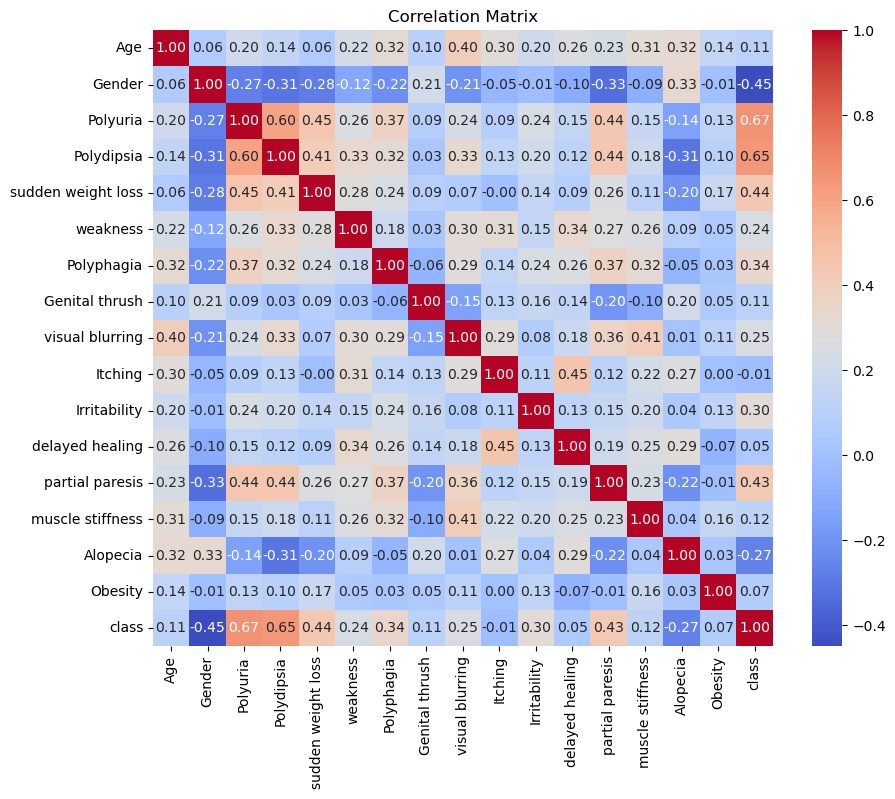

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Osteoporosis' is your target column
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Assuming df is your DataFrame and 'Osteoporosis' is your target column
X = df.drop(['class'], axis=1)  # Exclude 'Id' column
y = df['class']


In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [15]:
y_train.value_counts()

class
1    249
0    167
Name: count, dtype: int64

In [16]:
y_test.value_counts()

class
1    71
0    33
Name: count, dtype: int64

In [17]:
print(X.shape,X_train.shape, X_test.shape)

(520, 16) (416, 16) (104, 16)


In [20]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    #"K-Nearest Neighbors": KNeighborsClassifier()
}


In [21]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score * 100:.2f}%")

Logistic Regression Accuracy: 92.31%
Decision Tree Accuracy: 94.23%
Support Vector Classifier Accuracy: 68.27%


In [24]:
from sklearn.metrics import confusion_matrix
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)
# Predict on the Test Data
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

DecisionTreeClassifier()


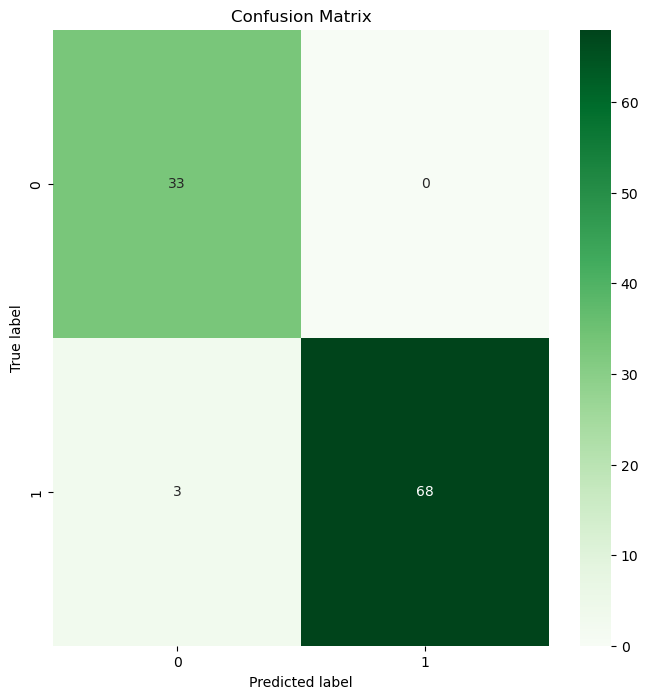

In [25]:
# Create a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [33]:
input_data = (40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
print(input_data_as_numpy_array)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person has Diabetes')
else:
  print('The Person does not have Diabetes')


[40  1  0  1  0  1  0  0  0  1  0  1  0  1  1  1]
[0]
The Person has Diabetes


In [28]:
for column in X.columns:
    print(column)

Age
Gender
Polyuria
Polydipsia
sudden weight loss
weakness
Polyphagia
Genital thrush
visual blurring
Itching
Irritability
delayed healing
partial paresis
muscle stiffness
Alopecia
Obesity


In [29]:
print(X.columns)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [30]:
import joblib
import pickle

In [34]:
filename = "../Diabetes.sav"

In [35]:
pickle.dump(model, open(filename,'wb'))
#joblib.dump(model, filename)

In [36]:
loaded_model = pickle.load(open(filename,'rb'))
#loaded_model = joblib.load(filename)

In [38]:
input_data = (42,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
print(input_data_as_numpy_array)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person has Diabetes')
else:
  print('The Person doesnot have a Diabetes')

[42  1  0  1  0  1  0  0  0  1  0  1  0  1  1  1]
[0]
The Person has Diabetes
